In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import LeaveOneOut
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [57]:
scores = pd.read_csv('cleaned_data/scores.csv')
conditions = scores.loc[0:19, :]
conditions['gender'] = np.where(conditions['gender']==1, 'F', 'M')
conditions['age'] = pd.Categorical(conditions['age'], categories=['25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69'], ordered=True)

C:\Users\dng09\AppData\Local\Temp\ipykernel_5620\1242993557.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conditions['gender'] = np.where(conditions['gender']==1, 'F', 'M')
C:\Users\dng09\AppData\Local\Temp\ipykernel_5620\1242993557.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conditions['age'] = pd.Categorical(conditions['age'], categories=['25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69'], ordered=True)


In [58]:
conditions.columns

Index(['number', 'days', 'gender', 'age', 'afftype', 'melanch', 'inpatient',
       'edu', 'marriage', 'work', 'madrs1', 'madrs2'],
      dtype='object')

In [59]:
loo = LeaveOneOut()
loss = 0
train_losses = []
test_losses = []
i = 0

for train_index, test_index in loo.split(X):
    # Get data
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = conditions['madrs2'][train_index], conditions['madrs2'][test_index]
    
    # Train model
    lm = LinearRegression()
    lm.fit(X_train, y_train)

    # Evaluate model
    squared_loss = (y_test - lm.predict(X_test))**2
    train_loss = (y_train - lm.predict(X_train))**2
    loss += squared_loss.sum()
    test_losses.append(squared_loss.sum())
    train_losses.append(np.mean(train_loss))


print(loss / X.shape[0])

12.423200558412425


In [60]:
print(np.mean(train_losses))
print(np.std(train_losses))

8.079105096794738
0.6061158172193113


In [63]:
print(np.std(test_losses))

12.423200558412425


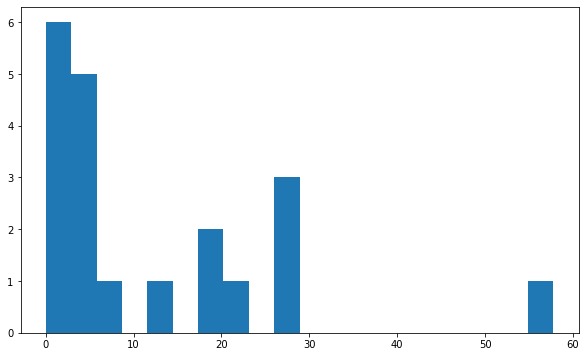

In [62]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(losses, bins=20);